### Importing the necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

### Reading the dataset and getting a glimpse of it to understand them

In [2]:
dataset = pd.read_csv('Telecom_customer_churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataset.shape

(7043, 21)

### There are 7043 rows and 21 columns in this dataset and we are supposed to predict the cusomter churn on this dataset

### Checking for the null values

In [4]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### I do not see any null values in this data, therefore checking for datatypes

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### I can see that one of the numerical column TotalCharges is read as object. Hence converting the same to float type

In [6]:
#dataset['TotalCharges'].astype('float')

## I'm unable to convert the TotalCharges to float because there is a presence of some character in it. Therefore checking the same using value counts

In [7]:
dataset['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

## I can see that the column contains space within them due to which I couldn't convert it to float. Therefore, I'm replacing it with the mean of the data 

In [8]:
dataset['TotalCharges']  = dataset['TotalCharges'].replace(' ',np.nan)

### I'm unable to directly impute the space with the mean, because the datatype is string. Therefore, I'm replacing the data with null value so that I can convert the data to float and impute the same

In [9]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Converting the Total Charges to float datatype

In [10]:
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float')

### Imputing the dataset to mean

In [11]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())

### Checking for  null values again

In [12]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping the customer ID because it is unique for each and every row and it will not have any relation whether the customers are churning or not

In [13]:
dataset = dataset.drop(columns = 'customerID')

### Converting the label using the label encoder

In [14]:
le = LabelEncoder()
en = le.fit_transform(dataset['Churn'])
pd.Series(en)
dataset['Churn'] = en

In [15]:
dataset['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Let's determine each feature's distribution and its relation with the target variable

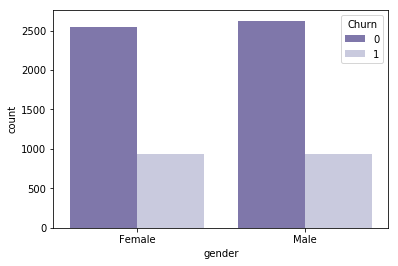

In [16]:
sns.countplot(dataset['gender'], palette = 'Purples_r', hue = dataset['Churn'])

In [17]:
cross = pd.crosstab(index = dataset['gender'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
gender,,,
Female,2549,939,26.920872
Male,2625,930,26.160338


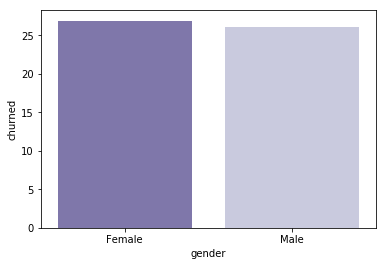

In [18]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'Purples_r')

### We can see from above plots that, the churn rates with male and female were almost equal to ~26-27%. To be precise the female customers had highest churn rates when compared to male customers

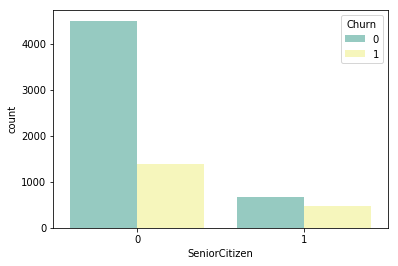

In [19]:
sns.countplot(dataset['SeniorCitizen'], palette = 'Set3', hue = dataset['Churn'])

In [20]:
cross = pd.crosstab(index = dataset['SeniorCitizen'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
SeniorCitizen,,,
0,4508,1393,23.606168
1,666,476,41.681261


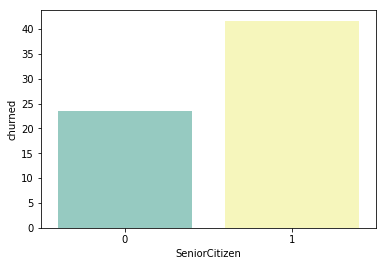

In [21]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'Set3')

### We can conclude from the above analysis that the senior citizens had higher churn rate of 42% approximate

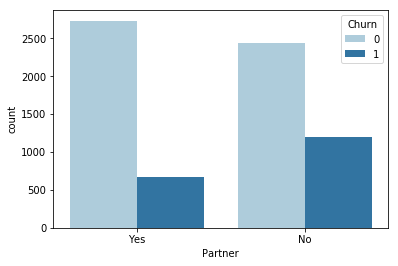

In [22]:
sns.countplot(dataset['Partner'], palette = 'Paired', hue = dataset['Churn'])

In [23]:
cross = pd.crosstab(index = dataset['Partner'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
Partner,,,
No,2441,1200,32.957979
Yes,2733,669,19.664903


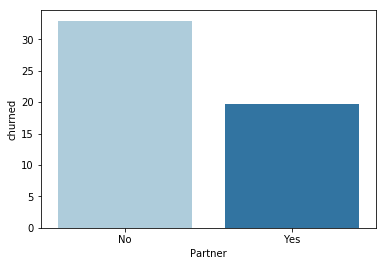

In [24]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'Paired')

### From the above analysis, I can conclude that the customers without partners had higher curn rate of ~33%

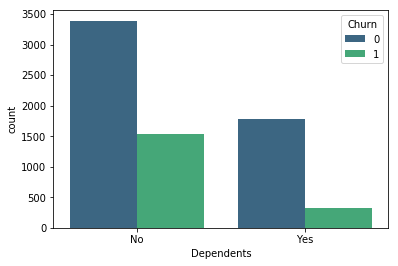

In [25]:
sns.countplot(dataset['Dependents'], palette = 'viridis', hue = dataset['Churn'])

In [26]:
cross = pd.crosstab(index = dataset['Dependents'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
Dependents,,,
No,3390,1543,31.279140
Yes,1784,326,15.450237


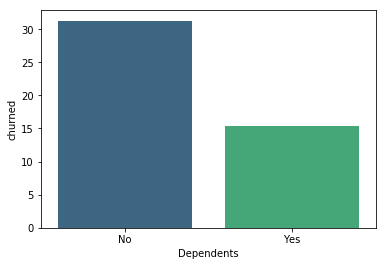

In [27]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'viridis')

### From the above analysis we can see that the customers without dependents had higher churn rated close to ~31%

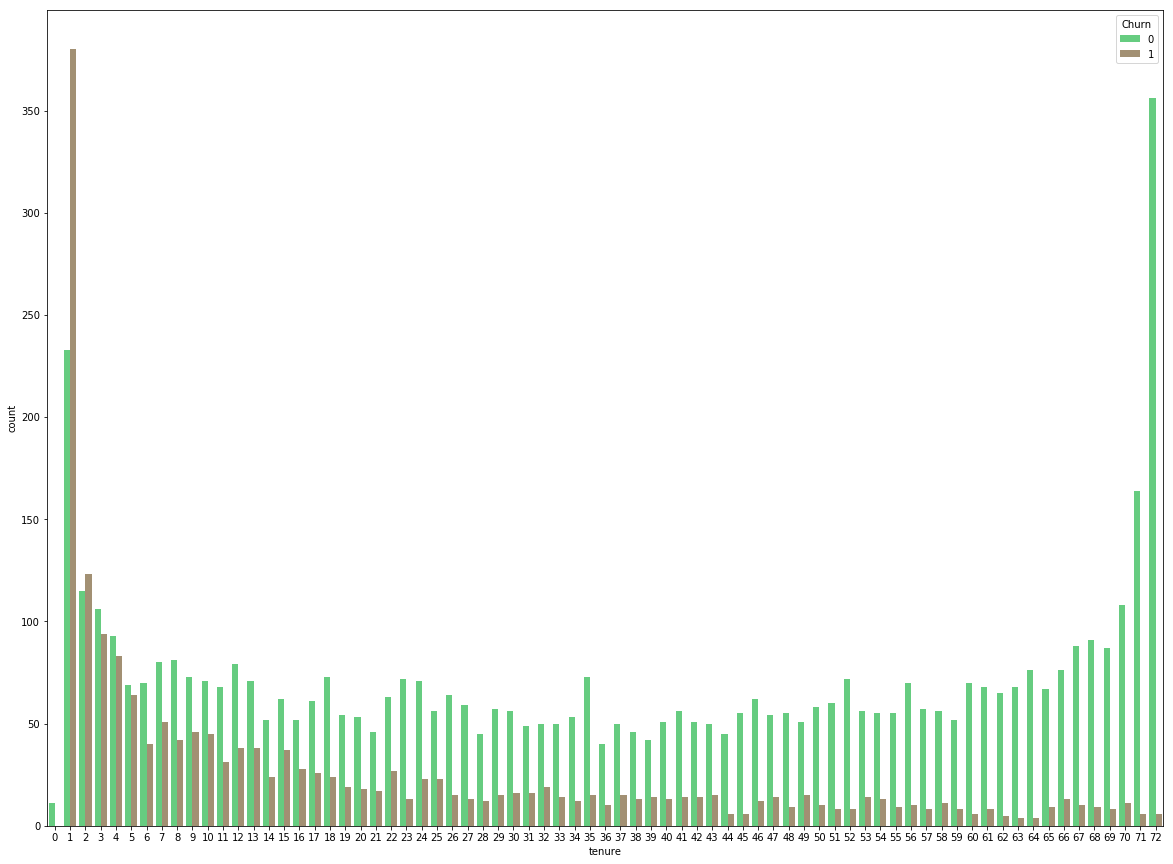

In [28]:
plt.figure(figsize = (20,15))
sns.countplot(x = dataset['tenure'], palette = 'terrain', hue = dataset['Churn'])

In [29]:
cross = pd.crosstab(index = dataset['tenure'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
tenure,,,
0,11,0,0.000000
1,233,380,61.990212
2,115,123,51.680672
3,106,94,47.000000
4,93,83,47.159091
...,...,...,...
68,91,9,9.000000
69,87,8,8.421053
70,108,11,9.243697


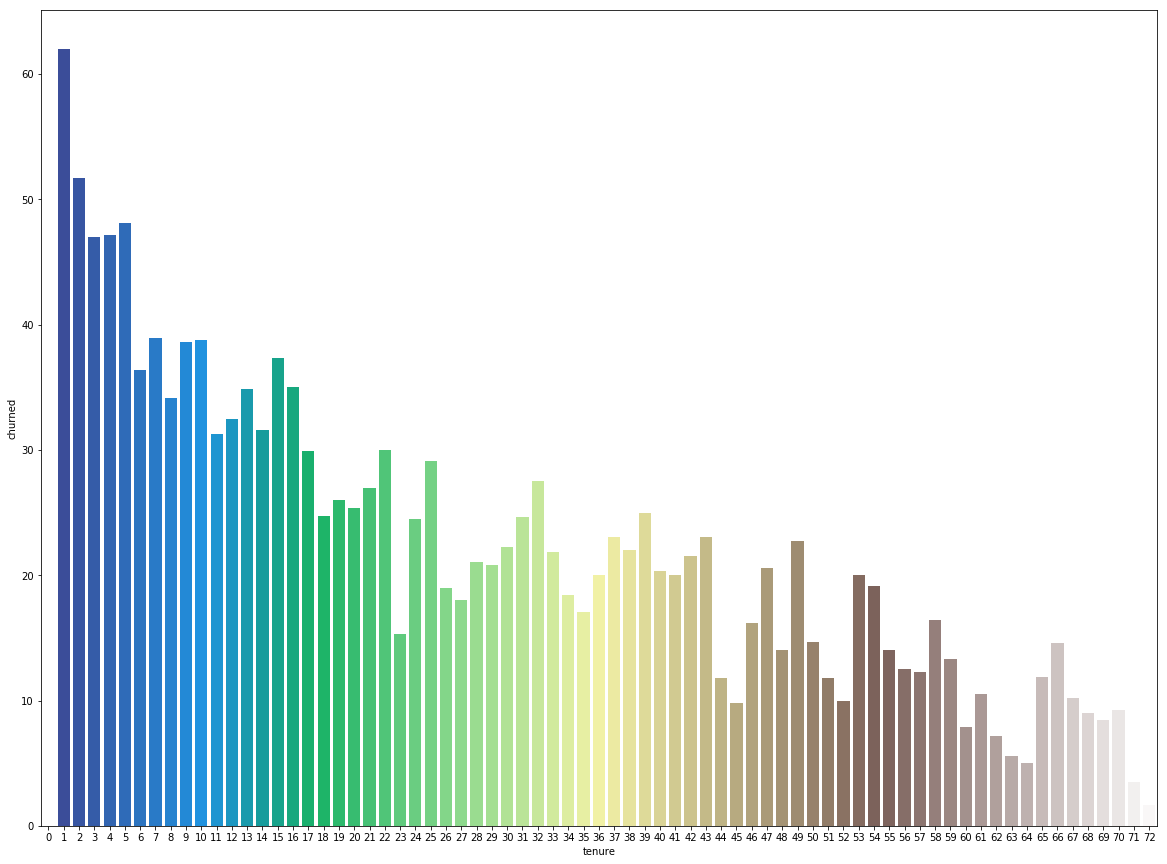

In [30]:
plt.figure(figsize = (20,15))
sns.barplot(x = cr.index, y = cr['churned'], palette = 'terrain')

### We can see from the above analysis that the churn rate decreases as the tenure of a customer is increased. In general customers with less tenure had higher churn rates

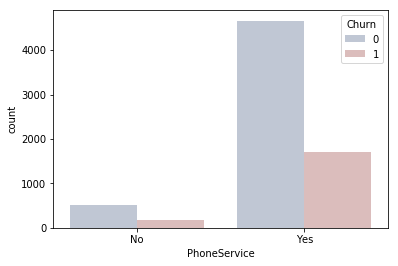

In [31]:
sns.countplot(x = dataset['PhoneService'], palette = 'vlag', hue = dataset['Churn'])

In [32]:
cross = pd.crosstab(index = dataset['PhoneService'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
PhoneService,,,
No,512,170,24.926686
Yes,4662,1699,26.709637


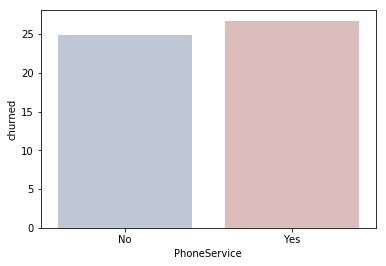

In [33]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'vlag')

### I can see from the above analysis that most of the customers opted for phone service out of which ~27% customers opted out of the service, Also the cutomers who didn't not opt for phone service had a churn rate of ~25%

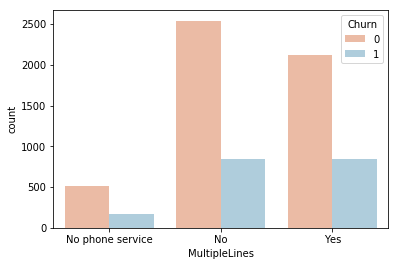

In [34]:
sns.countplot(x = dataset['MultipleLines'], palette = 'RdBu', hue = dataset['Churn'])

In [35]:
cross = pd.crosstab(index = dataset['MultipleLines'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
MultipleLines,,,
No,2541,849,25.044248
No phone service,512,170,24.926686
Yes,2121,850,28.609896


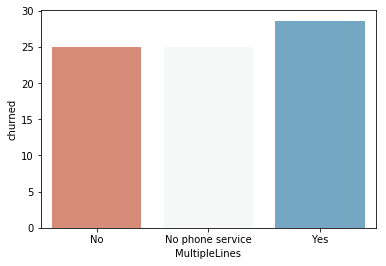

In [36]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'RdBu')

### From the above analysis, we can say that the customers who opted for the Multiple lines had higher churn rates (~28%) when compared to customer who didn't opt for the multiple lines

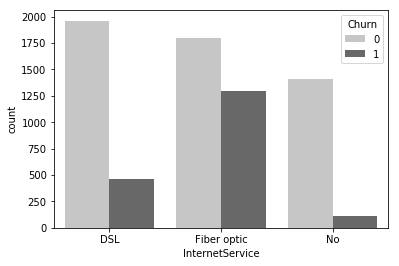

In [37]:
sns.countplot(x = dataset['InternetService'], palette = 'Greys', hue = dataset['Churn'])

In [38]:
cross = pd.crosstab(index = dataset['InternetService'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
InternetService,,,
DSL,1962,459,18.959108
Fiber optic,1799,1297,41.892765
No,1413,113,7.404980


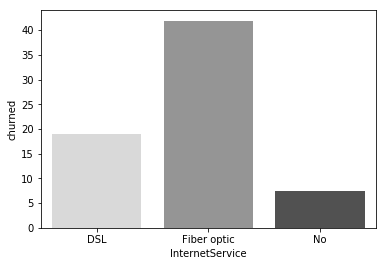

In [39]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'Greys')

### From tha above analysis we can clearly say that customers who opted for the Fiber optic Internet Servide had higher churn rates (~42), when compared to the customerswho opted for DSL type internet connection (~19%) and to the customers who didn't opt for internet service(~7%)

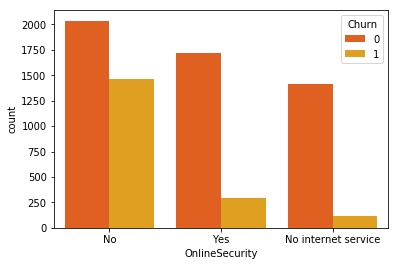

In [40]:
sns.countplot(x = dataset['OnlineSecurity'], palette = 'autumn', hue = dataset['Churn'])

In [41]:
cross = pd.crosstab(index = dataset['OnlineSecurity'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
OnlineSecurity,,,
No,2037,1461,41.766724
No internet service,1413,113,7.404980
Yes,1724,295,14.611194


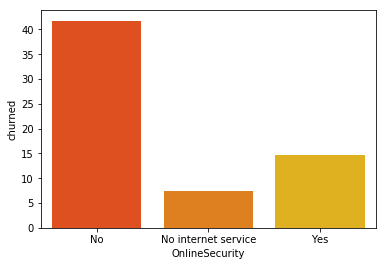

In [42]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'autumn')

### As per the above analysis, 2019 customers opted for online security and their churn rates were ~15%, 3498 customer didn't opt for the online security and had churn rates of ~42% and 1526 customers didn't opt for internet service at all and had lesser churn rates of ~7%

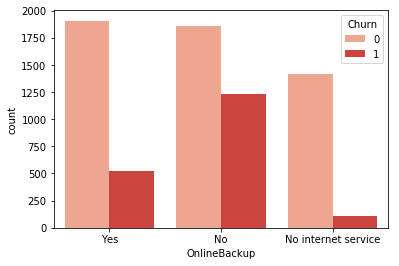

In [43]:
sns.countplot(x = dataset['OnlineBackup'], palette = 'Reds', hue = dataset['Churn'])

In [44]:
cross = pd.crosstab(index = dataset['OnlineBackup'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
OnlineBackup,,,
No,1855,1233,39.928756
No internet service,1413,113,7.404980
Yes,1906,523,21.531494


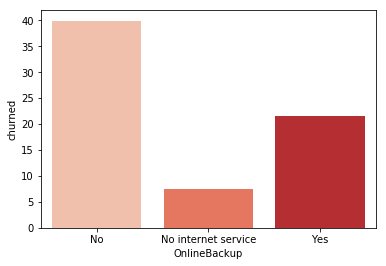

In [45]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'Reds')

### We can see from the above analysis that 3088 customers didn't opt for back up and almost 40% opted out, on the other hand 2429 customers had opted for online back up and out of which 21% customers churned out. Further there are few customers who didn't opt for internet service at all and their churn rates were 7.4%

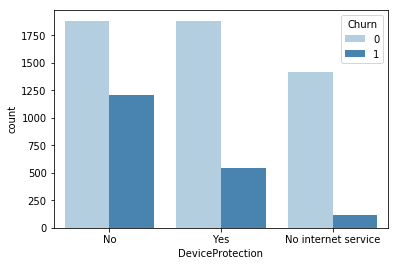

In [46]:
sns.countplot(x = dataset['DeviceProtection'], palette = 'Blues', hue = dataset['Churn'])

In [47]:
cross = pd.crosstab(index = dataset['DeviceProtection'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
DeviceProtection,,,
No,1884,1211,39.127625
No internet service,1413,113,7.404980
Yes,1877,545,22.502064


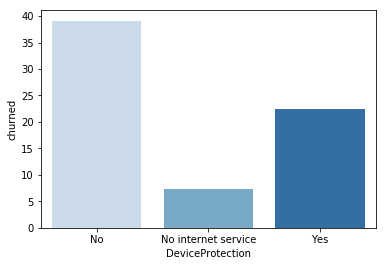

In [48]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'Blues')

### From the above analysis we can say that the customers who opted for device protection had churn rate of 22.5% and the customers who had not opted for the device protection had churn date of 39%. Further there are few customers who didn't opt for internet service at all and their churn rates were 7.4%

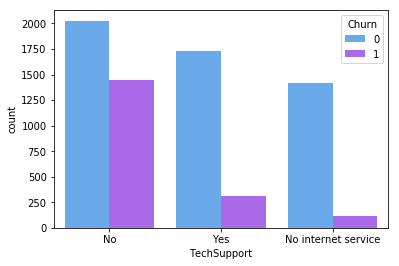

In [49]:
sns.countplot(x = dataset['TechSupport'], palette = 'cool', hue = dataset['Churn'])

In [50]:
cross = pd.crosstab(index = dataset['TechSupport'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
TechSupport,,,
No,2027,1446,41.635474
No internet service,1413,113,7.404980
Yes,1734,310,15.166341


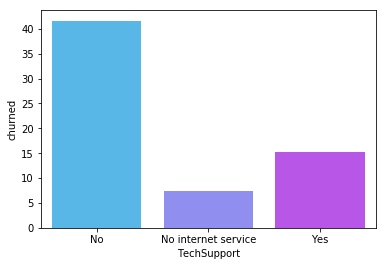

In [51]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'cool')

### From the above analysis we can say that the customers who opted for tech support had lesser churn rates of 15% when compared to customers who didn't opt for tech support had higher churn rates of  ~42%

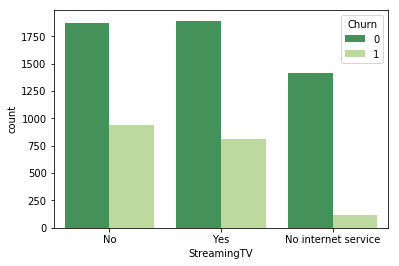

In [52]:
sns.countplot(x = dataset['StreamingTV'], palette = 'YlGn_r', hue = dataset['Churn'])

In [53]:
cross = pd.crosstab(index = dataset['StreamingTV'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
StreamingTV,,,
No,1868,942,33.523132
No internet service,1413,113,7.404980
Yes,1893,814,30.070188


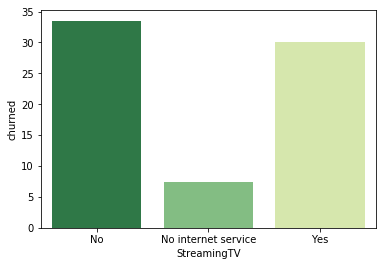

In [54]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'YlGn_r')

### We can see from the above analysis that there isn't much difference in churn rates of the customers whether or not they opted for streaming TV. which clearly tells us that even if the cutomer opts for the streaming TV the churn rates for ~30% anyway which is close to the churn rates of customers who didn't opt for streaming service.

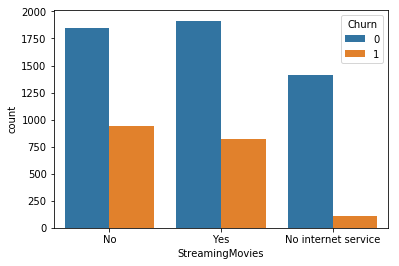

In [55]:
sns.countplot(x = dataset['StreamingMovies'], palette = 'tab10', hue = dataset['Churn'])

In [56]:
cross = pd.crosstab(index = dataset['StreamingMovies'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
StreamingMovies,,,
No,1847,938,33.680431
No internet service,1413,113,7.404980
Yes,1914,818,29.941435


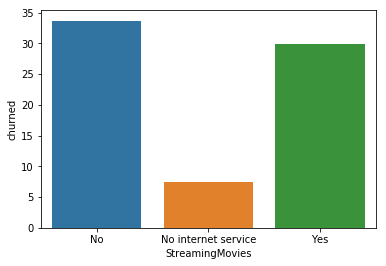

In [57]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'tab10')

### We can see from the above analysis that the customers with the streaming service had churn rates of 30% and the customer without streaming services had churn rates of 34%. Just like previous analysis there is no much difference in churn rates whether or not the customers opted for the streaming services

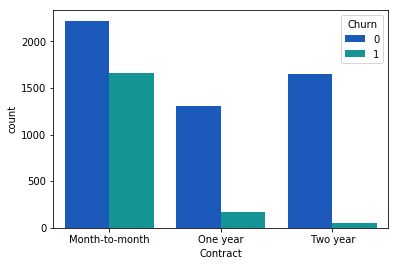

In [58]:
sns.countplot(x = dataset['Contract'], palette = 'winter', hue = dataset['Churn'])

In [59]:
cross = pd.crosstab(index = dataset['Contract'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
Contract,,,
Month-to-month,2220,1655,42.709677
One year,1307,166,11.269518
Two year,1647,48,2.831858


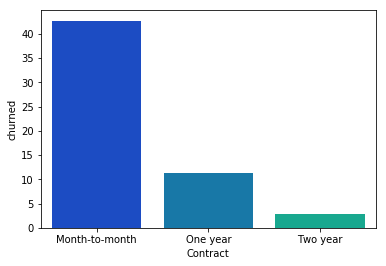

In [60]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'winter')

### From the above analysis, we can conclude that the customers with yearly contracts had very less churn rates (3% for 2 year and 11% for 1 year) when compared to customers with monthly contracts. We can see relation ship with the contract length as they found value for the money they paid

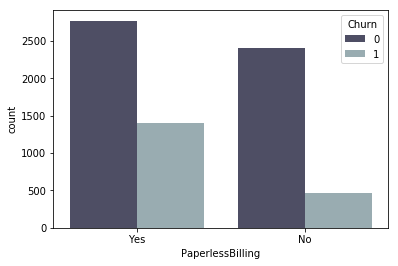

In [61]:
sns.countplot(x = dataset['PaperlessBilling'], palette = 'bone', hue = dataset['Churn'])

In [62]:
cross = pd.crosstab(index = dataset['PaperlessBilling'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
PaperlessBilling,,,
No,2403,469,16.330084
Yes,2771,1400,33.565092


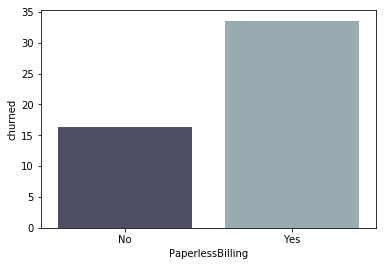

In [63]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'bone')

### From the above analysis I can say that the customers who opted for paperless billing had less churn rates(16%) when compared to the customers who  didn't opt for paperless billing (34%)

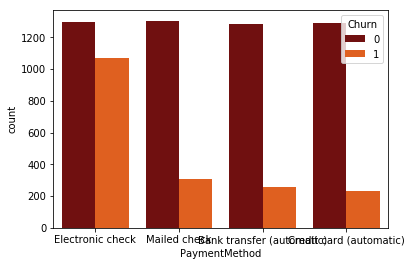

In [64]:
sns.countplot(x = dataset['PaymentMethod'], palette = 'gist_heat', hue = dataset['Churn'])

In [65]:
cross = pd.crosstab(index = dataset['PaymentMethod'], columns = dataset['Churn'])
cr = pd.DataFrame(cross)
cr['churned'] = (cr[1]*100/(cr[0]+cr[1]))
cr

Churn,0,1,churned
PaymentMethod,,,
Bank transfer (automatic),1286,258,16.709845
Credit card (automatic),1290,232,15.243101
Electronic check,1294,1071,45.285412
Mailed check,1304,308,19.106700


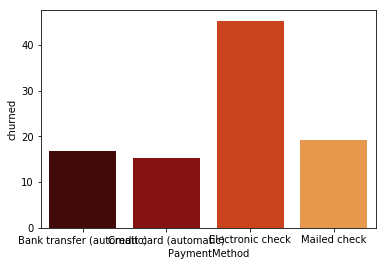

In [66]:
sns.barplot(x = cr.index, y = cr['churned'], palette = 'gist_heat')

### From the above analysis I can say that the customers who had used the electronic check as payment method had higher churn rates(~45%) when compared to the customers who used other payment methods, there is a possibility that there are hiher processing fee for the electronic checks or its just the customer had poor experience with the same

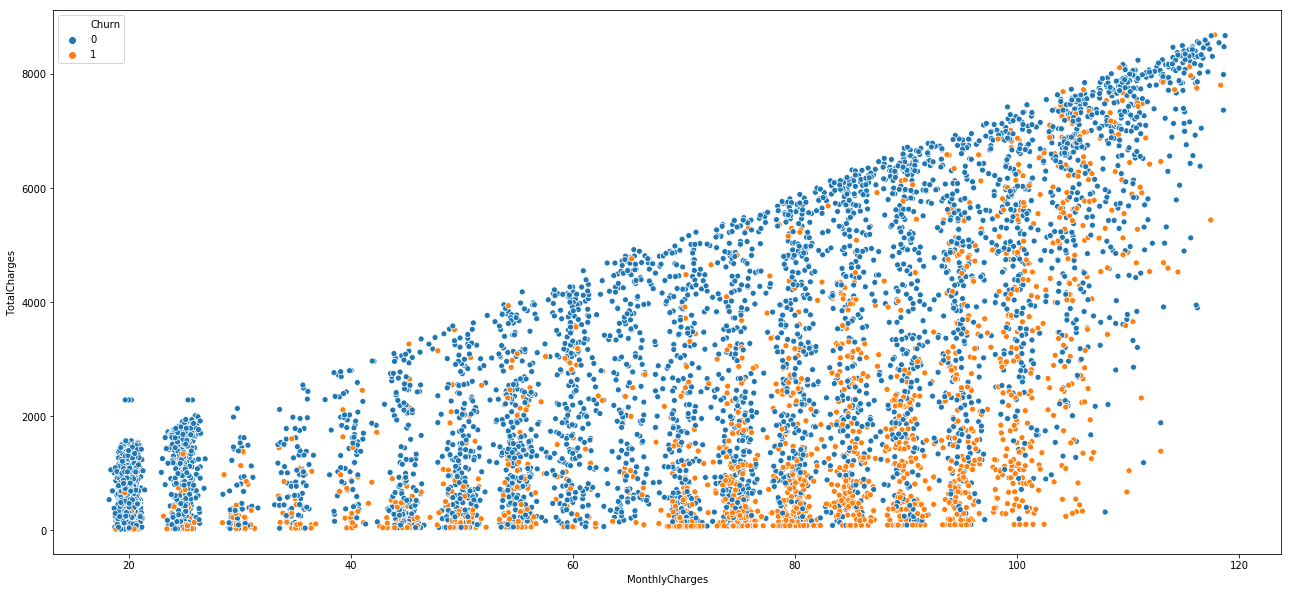

In [67]:
plt.figure(figsize = (22,10))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data = dataset, hue = 'Churn', sizes = 500)

### From the above figure, I can see that the customers who are paying higher charges with respect to monthly charges or yearly charges are churning. The churn rate increased as the charges are increased.

## Before, I can move forward, i'm encoding the categorical columns with the ordinal enoder, since most of the columns features are of 2-3 categories

In [68]:
enc = OrdinalEncoder()
for i in dataset:
    if dataset[i].dtypes == 'object':
        dataset[i] = enc.fit_transform(dataset[i].values.reshape(-1,1))

In [69]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


### Checking for the correlation of the features with the target variable

In [70]:
corr = dataset.corr()
corr['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

### Upon reviewing, I can see that the contract column has high negative correlation with the data and the gender column has a very less correlation

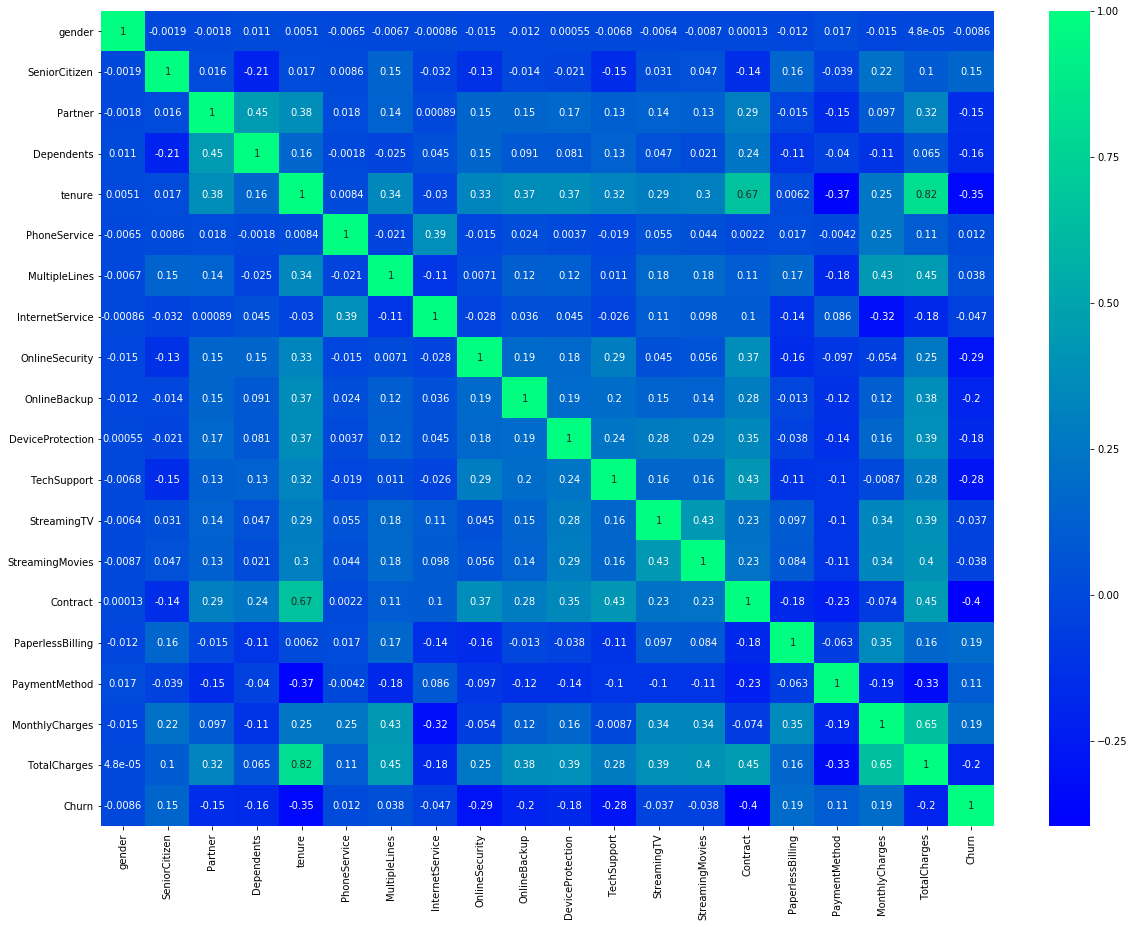

In [71]:
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot = True, cmap = 'winter')

### As per the above plot, i can see that the tenure has highest correlation with the TotalCharges, other than that all the otther columns doesn't have much correlation. I sense no multi-collinearity issue here.

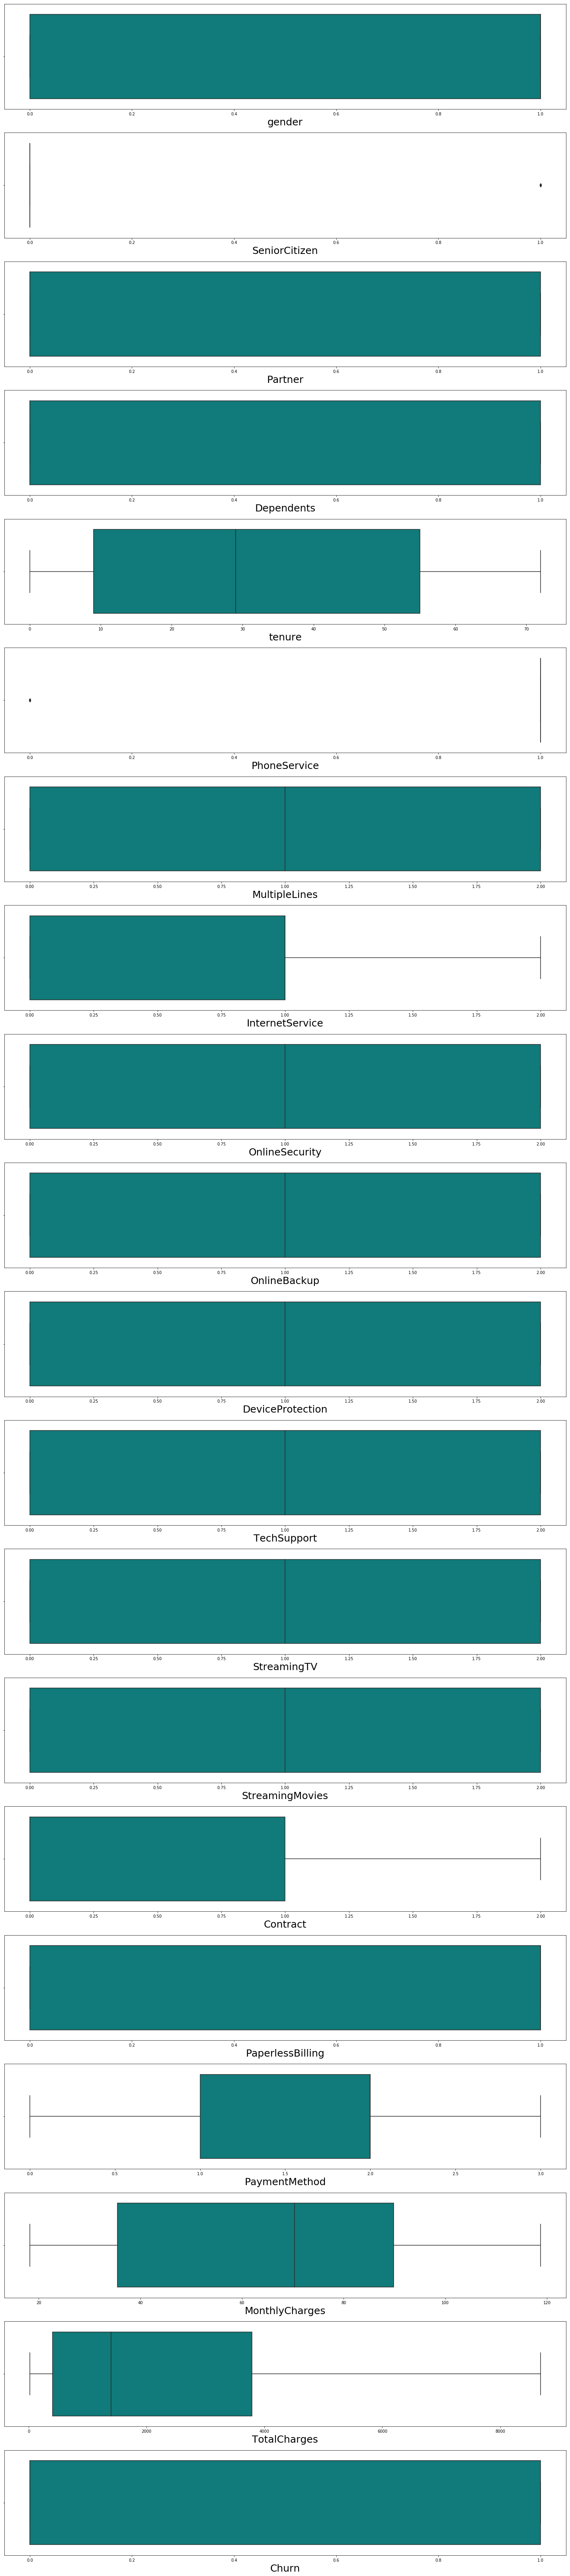

In [72]:
plt.figure(figsize= (20,90))
pltnum = 1
for i in dataset:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(dataset[i],color = 'darkcyan')
        plt.xlabel(i,fontsize=25)
    pltnum+=1
plt.tight_layout()

### Although there are no visible outlier, we are usig zscore to remove if there are any outlier on the continuous data type columns

### Using z-score method to remove the outliers

In [73]:
from scipy.stats import zscore
z = np.abs(zscore(dataset[['MonthlyCharges','TotalCharges']]))

In [74]:
new_data = dataset[(z<3).all(axis = 1)]
print(dataset.shape)
print(new_data.shape)

(7043, 20)
(7043, 20)


### There is less than 2% data loss. Hence proceeding with the data removal

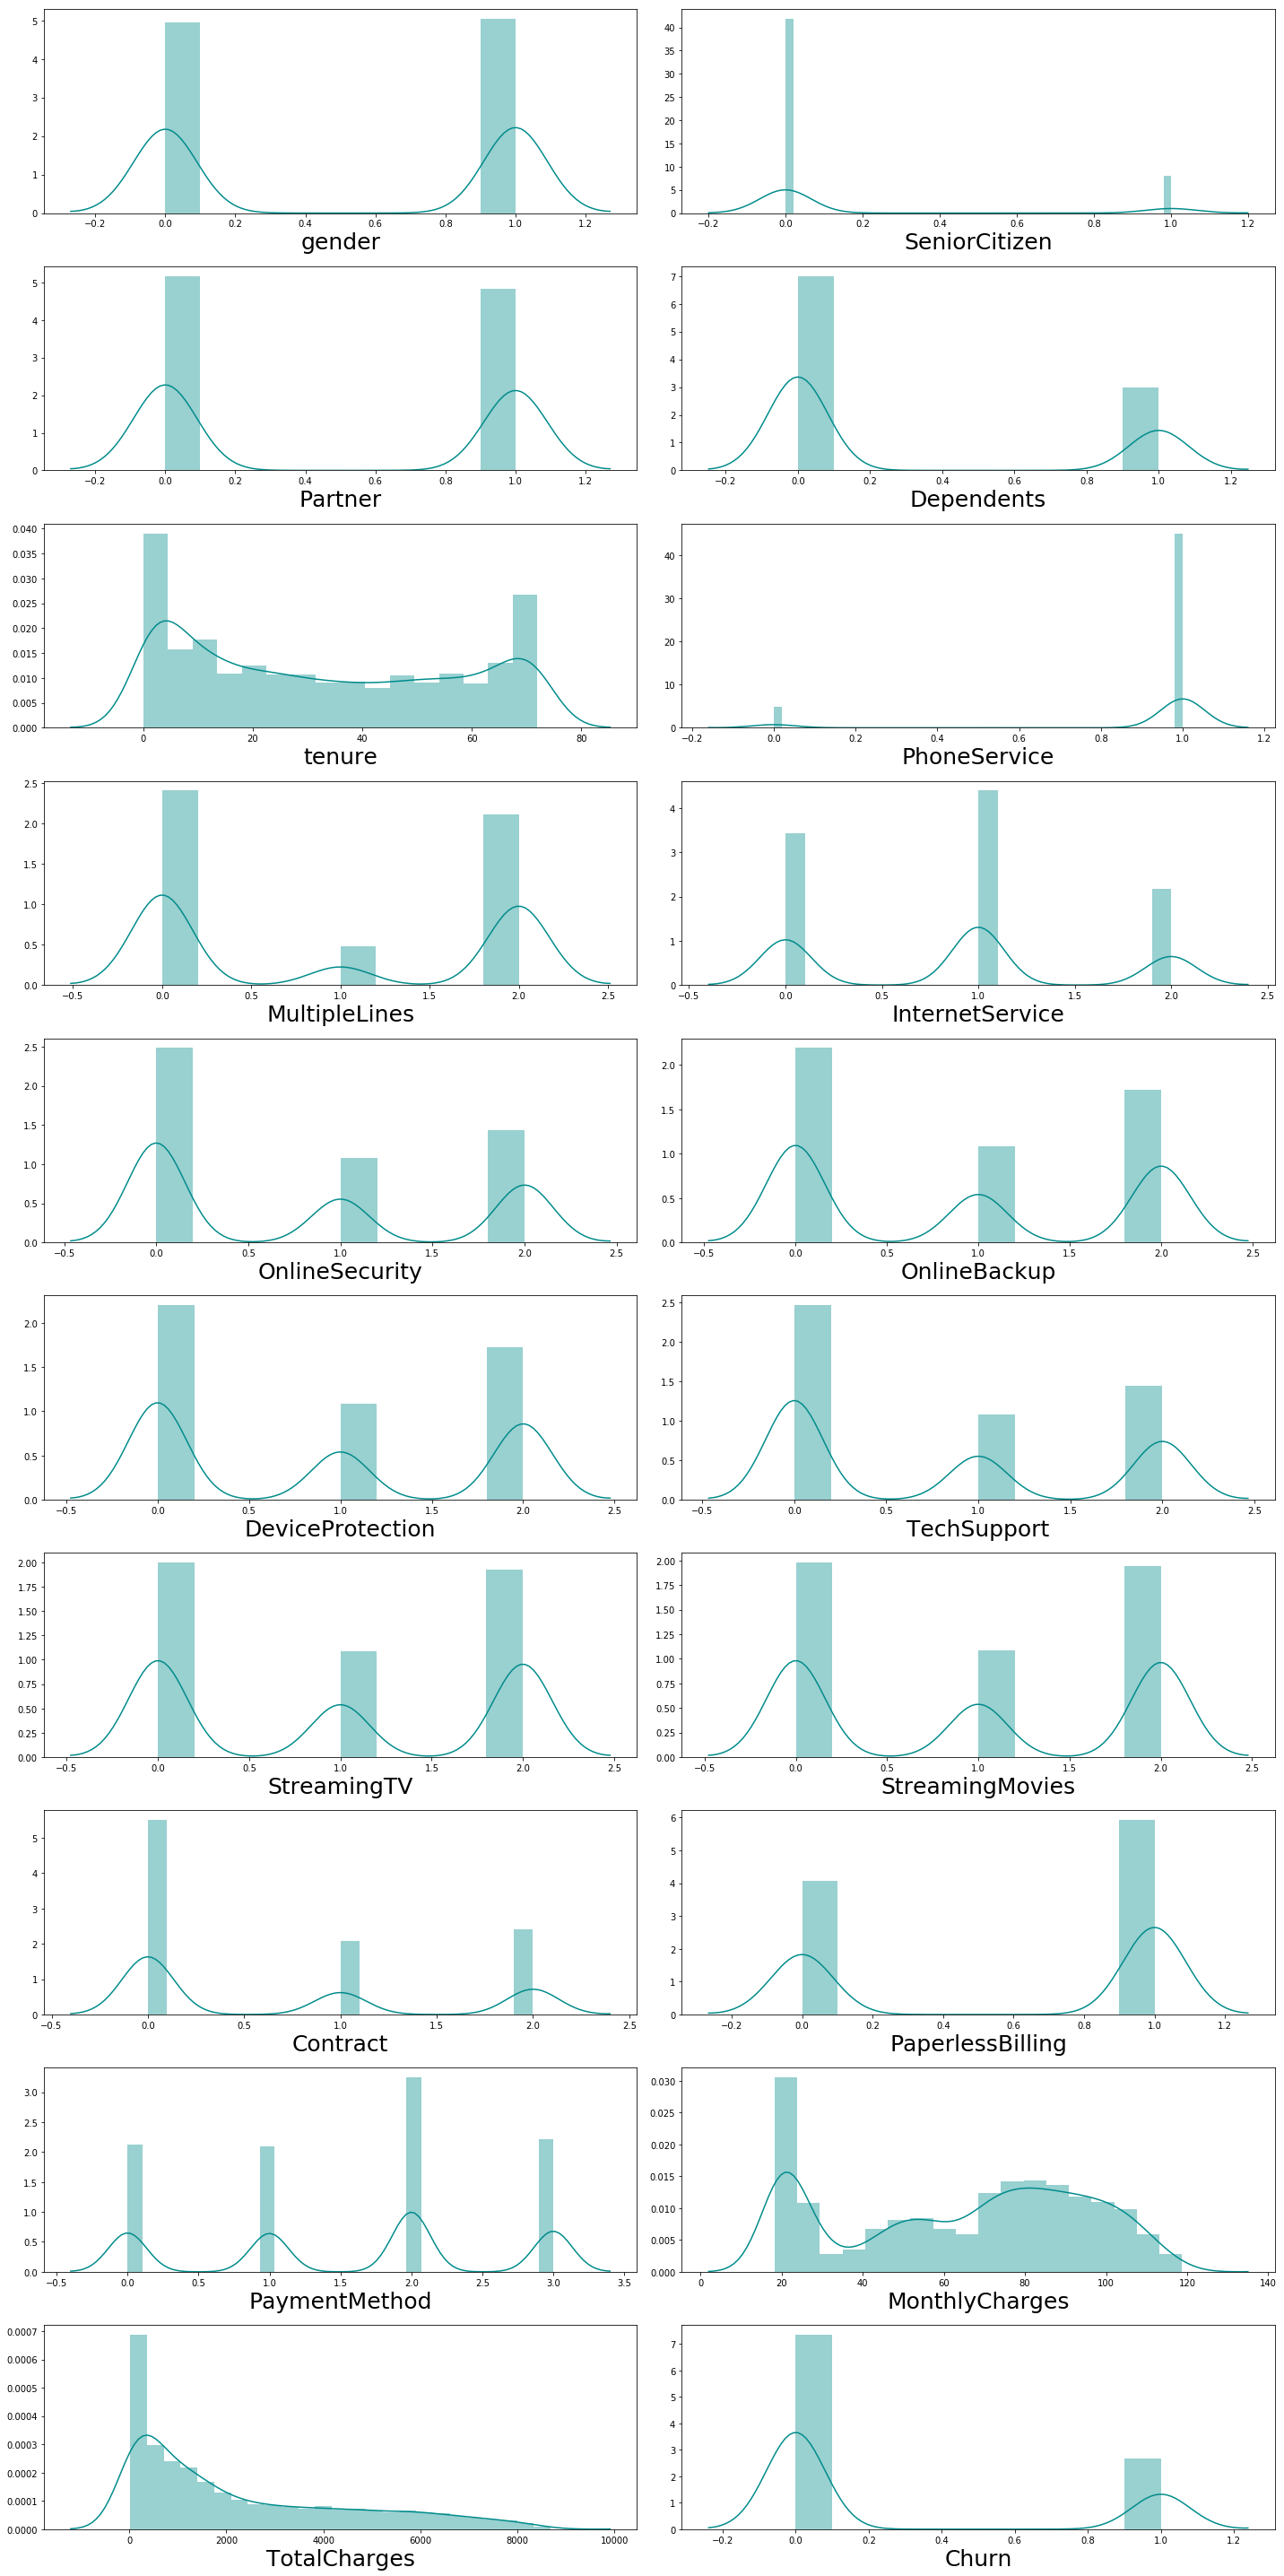

In [75]:
plt.figure(figsize= (20,40))
pltnum = 1
for i in new_data:
    if pltnum <=20:
        plt.subplot(10,2,pltnum)
        sns.distplot(new_data[i],color = 'darkcyan')
        plt.xlabel(i,fontsize=25)
    pltnum+=1
plt.tight_layout()

### I can see some skewness in the data,  hence I'm checking the actual skewness number using .skew method

In [76]:
new_data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

### We can conclude from the above information that total charges is skewed. proceeding with splitting the data to dependent and independent columns

In [77]:
x = new_data.drop(columns = 'Churn')
y = new_data['Churn']

In [78]:
tran = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tran, columns = x.columns)

### Checking for skewness again

In [79]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
dtype: float64

### The skewness is under control and its in the range of -0.5 to 0.5 for continuous data columns. Checking for distribution again

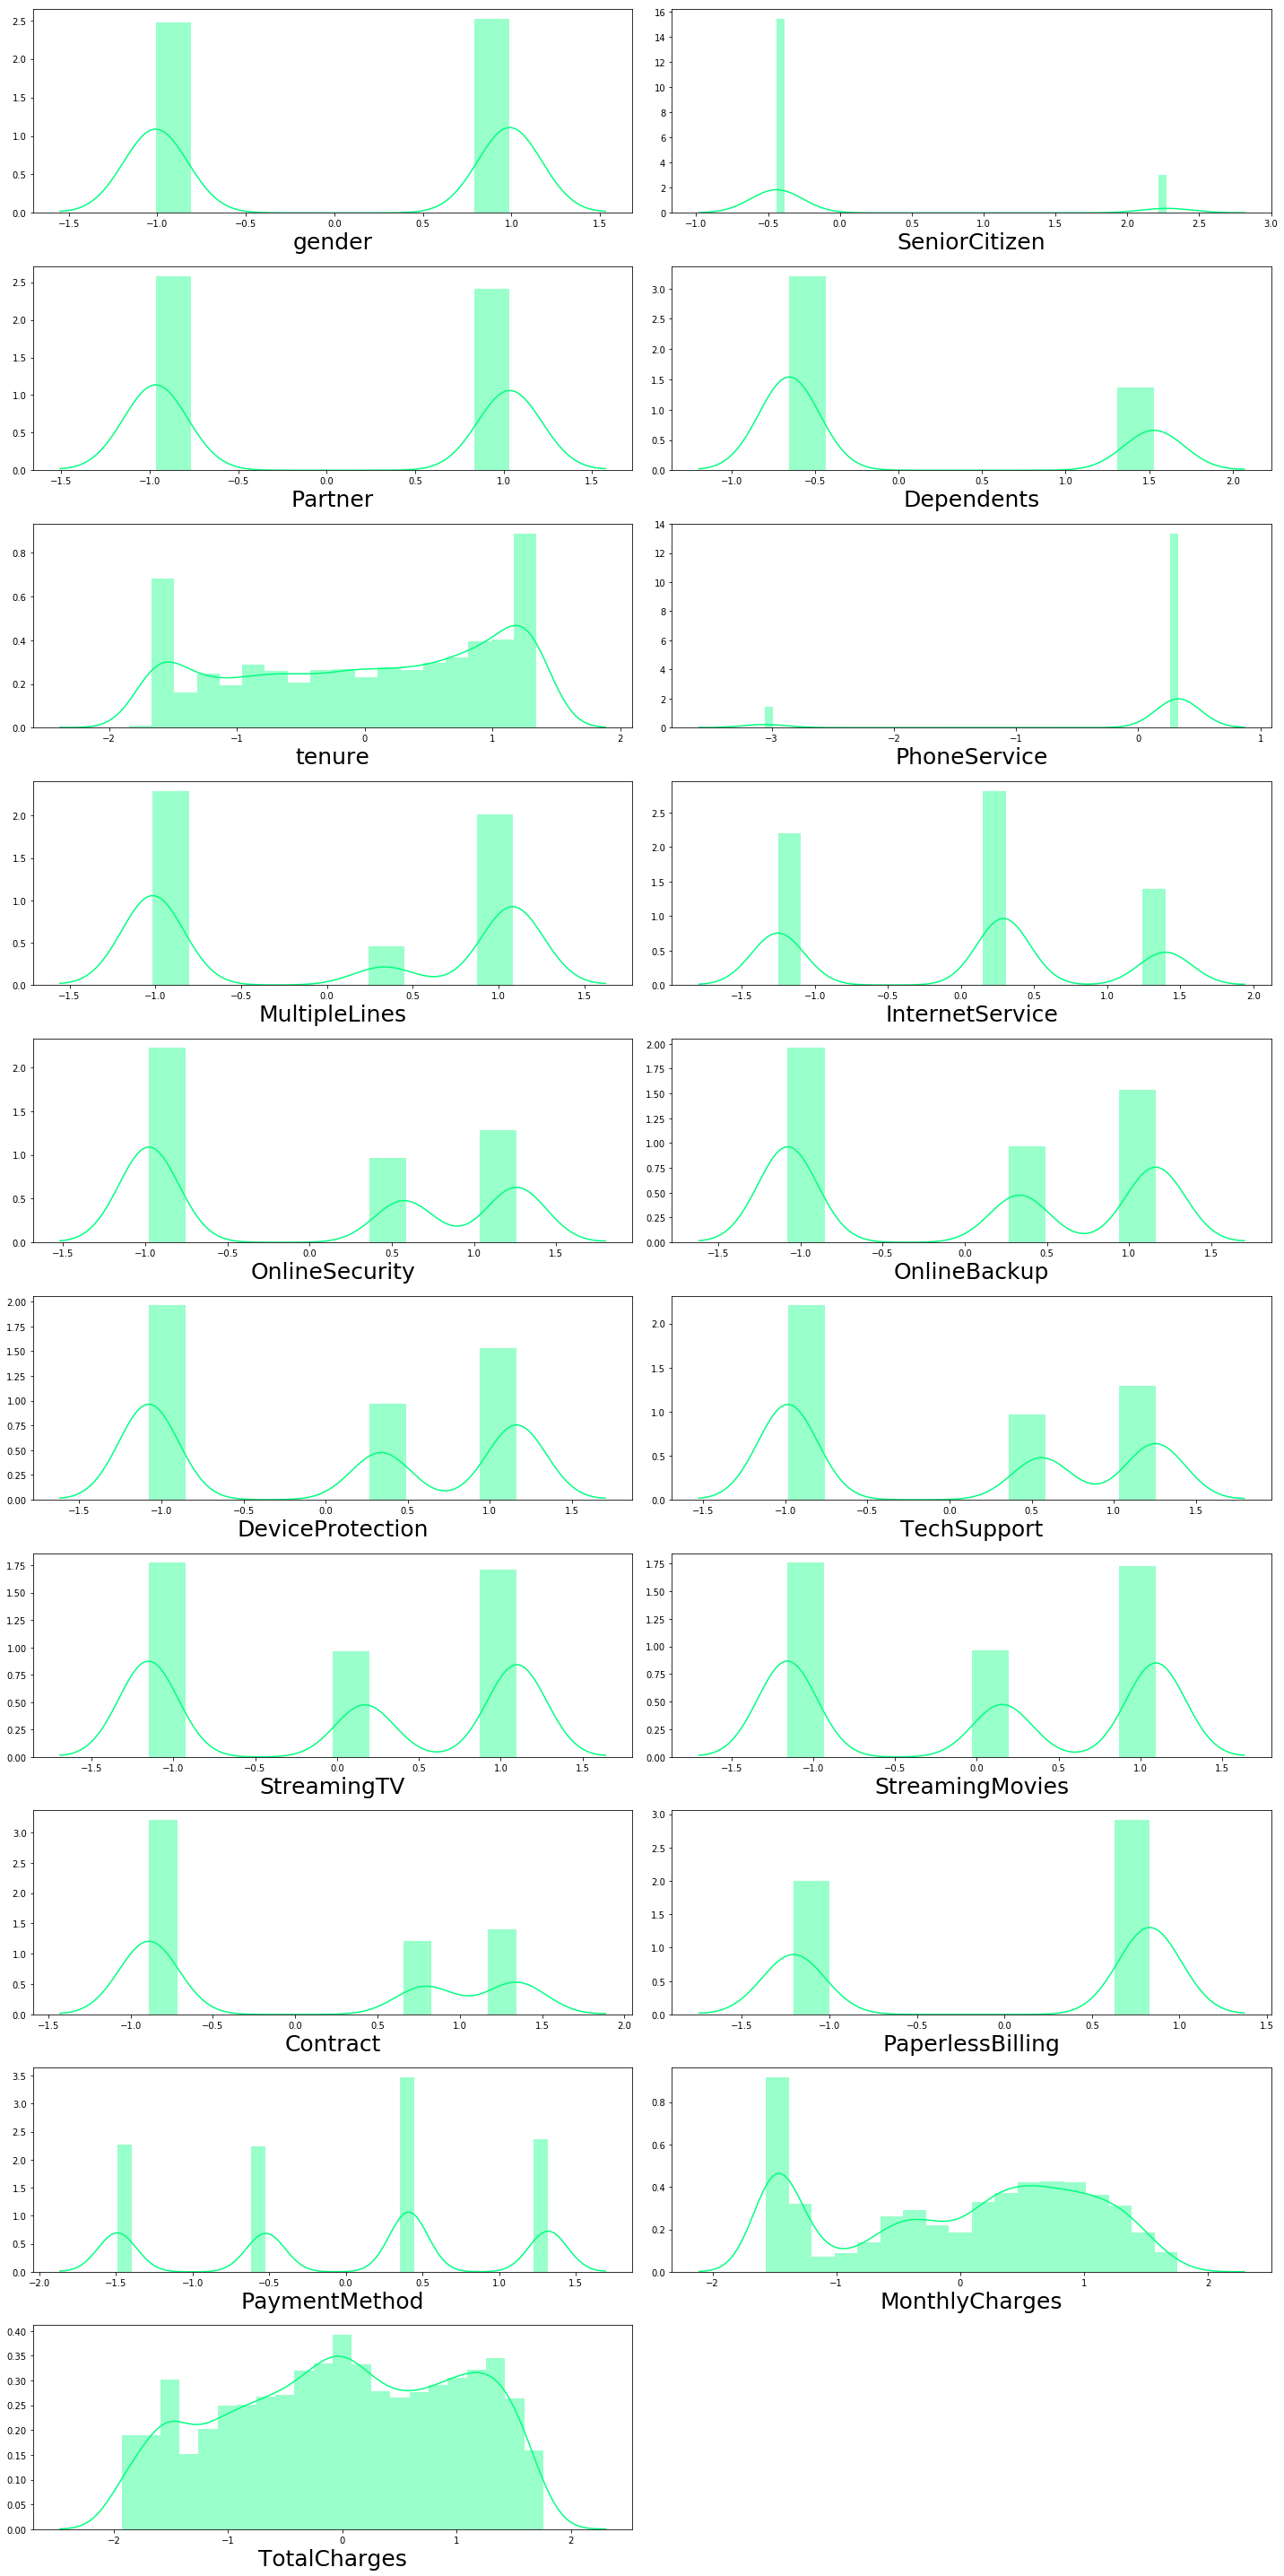

In [80]:
plt.figure(figsize= (20,40))
pltnum = 1
for i in x:
    if pltnum <=20:
        plt.subplot(10,2,pltnum)
        sns.distplot(x[i],color = 'springgreen')
        plt.xlabel(i,fontsize=25)
    pltnum+=1
plt.tight_layout()

### Let's check for class imbalance

In [81]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### I can see that there is a class imbalance in the data. I'm handling with the SMOTE over sampling method

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

## We have handled the class imbalance issue. Therefore proceeding with finding the best random state for the dataset to split the same

In [83]:
from sklearn.linear_model import LogisticRegression
brs = 0
for i in range(0,3000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        if i>brs:
            brs = i
print('the best random state for the data set is', brs)

the best random state for the data set is 2995


### Splitting the dataset in to test and train using the best randomstate

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = brs)

## Model 1: Logistic Regression

In [85]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)
print('The Accuracy score for the Logistic Regression is' , lg_score)

The Accuracy score for the Logistic Regression is 0.7759882869692533


## Model 2: Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_score = accuracy_score(y_test, rf_pred)
print('The Accuracy score for the Random Forest Classifier is' , rf_score)

The Accuracy score for the Random Forest Classifier is 0.8579795021961932


## Model 3: Extra Trees Classifier

In [87]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test,et_pred)
print('The Accuracy score for the Extra Trees Classifier is' , et_score)

The Accuracy score for the Extra Trees Classifier is 0.8632503660322108


## Model 4: XGB Classifier

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_pred)
print('The Accuracy score for the XG Boost Classifier is' , xgb_score)

The Accuracy score for the XG Boost Classifier is 0.8518301610541728


## Model 5: Support Vector Classifier

In [89]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
sv_pred =svc.predict(x_test)
sv_score = accuracy_score(y_test,sv_pred)
print('The Accuracy score for the Support Vector Classifier is' , sv_score)

The Accuracy score for the Support Vector Classifier is 0.808199121522694


## Model 6 KNN Classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,knn_pred)
print('The Accuracy score for the KNeigbhors Classifier is' , knn_score)

The Accuracy score for the KNeigbhors Classifier is 0.7847730600292826


### Checking for model over fitting using cross validation score

In [91]:
cv = cross_val_score(lg,x_over,y_over, cv =7)
cv_mean = cv.mean()
cv_mean

0.773967447088023

In [92]:
cv1 = cross_val_score(rf,x_over,y_over, cv =7)
cv1_mean = cv1.mean()
cv1_mean

0.8571861855656356

In [93]:
cv2 = cross_val_score(et,x_over,y_over, cv =7)
cv2_mean = cv2.mean()
cv2_mean

0.8678124975901423

In [94]:
cv3 = cross_val_score(xgb,x_over,y_over, cv =7)
cv3_mean = cv3.mean()
cv3_mean

0.8442444496813237

In [95]:
cv4 = cross_val_score(svc,x_over,y_over, cv =7)
cv4_mean = cv4.mean()
cv4_mean

0.8084720986523488

In [96]:
cv5 = cross_val_score(knn,x_over,y_over, cv =7)
cv5_mean = cv5.mean()
cv5_mean

0.7942620097826821

## Finding the best model for the above fit models

In [98]:
mod = [lg_score,rf_score,et_score,xgb_score,sv_score,knn_score]
cv = [cv_mean,cv1_mean,cv2_mean,cv3_mean,cv4_mean,cv5_mean]
model = pd.DataFrame({})
model['mod'] = mod
model['cv'] = cv
model['Diff'] = model['mod'] - model['cv']
model

,mod,cv,Diff
0,0.775988,0.773967,0.002021
1,0.857980,0.857186,0.000793
2,0.863250,0.867812,-0.004562
3,0.851830,0.844244,0.007586
4,0.808199,0.808472,-0.000273
5,0.784773,0.794262,-0.009489


## From the above data frame I can see that Extra Trees is the best model

### Hyper parameter tuning

In [103]:
params = {'n_estimators':[100,150,200,250,300],
         'criterion':['gini','entropy'],
         'max_depth':[10,12,14,16,18],
         'min_samples_split':[3,5,7,9],
         'bootstrap':[True,False]}

In [104]:
gcv = GridSearchCV(ExtraTreesClassifier(),params, cv =5, n_jobs =-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16, 18],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [105]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_split': 3,
 'n_estimators': 150}

### Fitting he final model after hyper parameter tuning

In [107]:
fnl_mod = ExtraTreesClassifier(bootstrap = False,criterion = 'entropy',max_depth = 18,
                              min_samples_split = 3, n_estimators = 150, n_jobs = -1)
fnl_mod.fit(x_train,y_train)
fnl_pred = fnl_mod.predict(x_test)
fnl_score = accuracy_score(y_test,fnl_pred)
print('The Accuracy score for the Tuned Extra Trees Classifier is' , fnl_score)

The Accuracy score for the Tuned Extra Trees Classifier is 0.8667642752562226


### From the below classification report, I can see that the model is good and the f1-score is balanced

In [110]:
print(classification_report(y_test,fnl_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1688
           1       0.85      0.90      0.87      1727

    accuracy                           0.87      3415
   macro avg       0.87      0.87      0.87      3415
weighted avg       0.87      0.87      0.87      3415



### Checking for AUC score

In [109]:
print(roc_auc_score(y_test, fnl_pred))

0.8664024058924744


## Plotting the ROC Curve

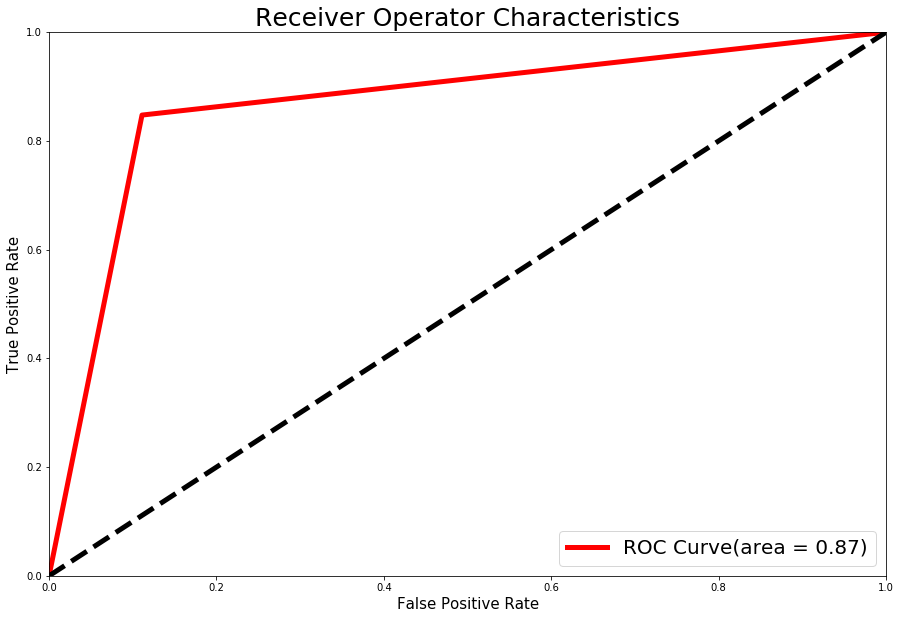

In [115]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds = roc_curve(fnl_pred, y_test)
roc_auc = auc(fpr,tpr)
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr, lw=5, color = 'red',label = 'ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1], lw =5, color = 'black',linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver Operator Characteristics',fontsize = 25)
plt.legend(loc = 'lower right', fontsize = 20)
plt.show()

### Saving the model

In [116]:
import joblib
joblib.dump(fnl_mod,'Customer_Churn.pkl')

['Customer_Churn.pkl']